In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# loading datas
df=pd.read_excel("/content/myexcel.xlsx")
df






,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [12]:
# generate random numbers between 150 and 180 in the 'Height' Column
np.random.seed(42)
df['Height']=np.random.randint(150,181,458)
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,153,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,166,231,Kansas,947276.0


In [13]:
#checking for the null values in the columns
df.isnull().sum()


,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


In [14]:
#checking for the duplicate values if any
df.duplicated().sum()


np.int64(0)

In [15]:
#replacing the null values
df['College'].fillna(df['College'].mode()[0],inplace=True)
df['Salary'].fillna(df['Salary'].median(),inplace=True)


<ipython-input-15-1607435982>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['College'].fillna(df['College'].mode()[0],inplace=True)
<ipython-input-15-1607435982>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [16]:
# set pandas display option to avoid scientific notation
pd.set_option('display.float_format','{:.2f}'.format)
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.00
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.00
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,2836186.00
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.00
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,Kentucky,5000000.00
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.00
454,Raul Neto,Utah Jazz,25,PG,24,153,179,Kentucky,900000.00
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,Kentucky,2900000.00
456,Jeff Withey,Utah Jazz,24,C,26,166,231,Kansas,947276.00


In [17]:
#saving preprocessed data
df.to_csv("/content/preprocessed_data.csv",index=False)



In [19]:
#Analysis Tasks:

#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

distribution_of_emp=df['Team'].value_counts()
percentage_distr=df['Team'].value_counts(normalize=True)*100

print("Distribution of Employees\n",distribution_of_emp)
print("\n\nPercentage Split\n",percentage_distr)


Distribution of Employees
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


Percentage Split
 Team
New Orleans Pelicans     4.15
Memphis Grizzlies

In [20]:
#2. Segregate employees based on their positions within the company.

position_distr=df['Position'].value_counts()
print("Employees based on their positions within the company",position_distr)


Employees based on their positions within the company Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [21]:
#3. Identify the predominant age group among employees.

age_bins = [18, 25, 30, 35, 40, 50]
age_labels = ['18-25', '26-30', '31-35', '36-40', '41-50']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = df['Age Group'].value_counts()
print("The predominant age group among employees\n",age_group_distribution)


The predominant age group among employees
 Age Group
26-30    182
18-25    154
31-35     90
36-40     29
41-50      3
Name: count, dtype: int64


In [22]:
#4. Discover which team and position have the highest salary expenditure.

highest_salary_team = df.groupby('Team')['Salary'].sum().idxmax()
print("The team Having highest salary expenditure is ",highest_salary_team )

highest_salary_position = df.groupby('Position')['Salary'].sum().idxmax()
print("The position having the highest salary expenditure is ",highest_salary_position)


The team Having highest salary expenditure is  Cleveland Cavaliers
The position having the highest salary expenditure is  C


In [23]:
# 5. Investigate if there's any correlation between age and salary, and represent it visually.

correlation=df[['Age','Salary']].corr()
print("\nThe correlation between age and salary\n ",correlation)



The correlation between age and salary
          Age  Salary
Age    1.00    0.21
Salary 0.21    1.00


<ipython-input-24-3827453375>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution_of_emp.index, y=distribution_of_emp.values, palette="coolwarm")


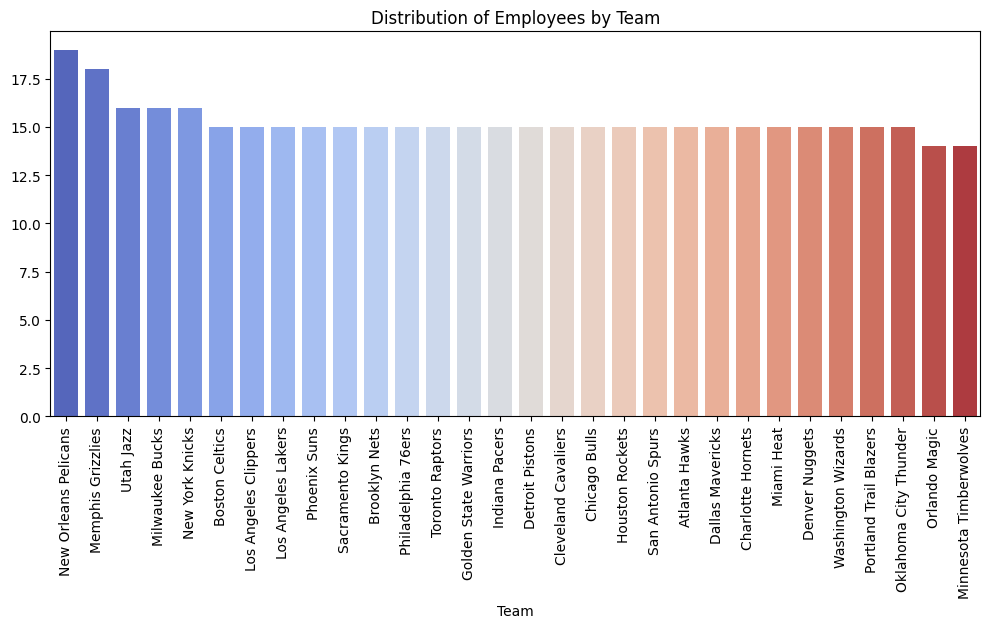

<ipython-input-24-3827453375>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_distr.index, y=position_distr.values, palette="coolwarm")


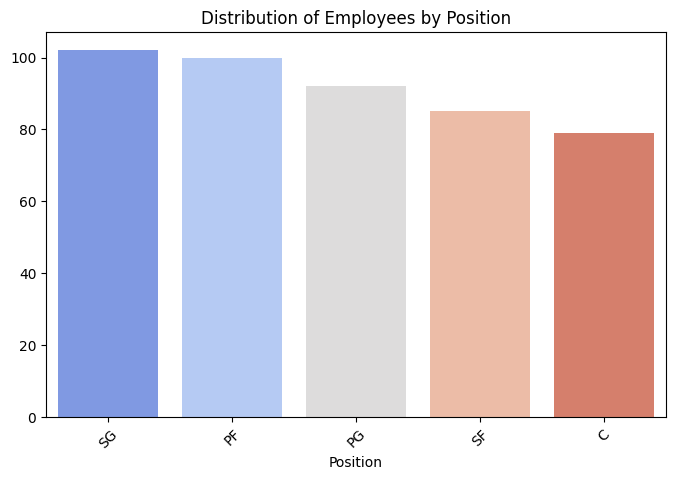

<ipython-input-24-3827453375>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="Blues")


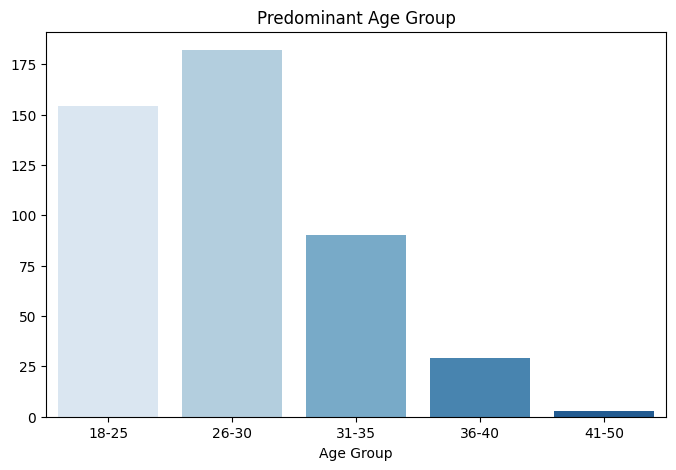

<ipython-input-24-3827453375>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_salary_team.index,y=highest_salary_team.values,palette='flare')


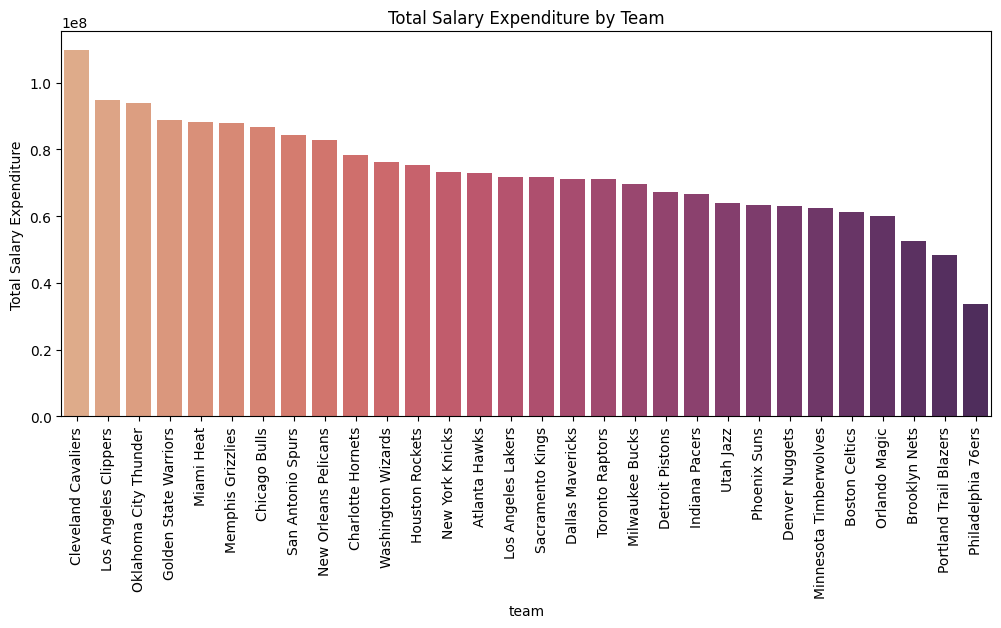

<ipython-input-24-3827453375>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_salary_position.index,y=highest_salary_position.values,palette='flare')


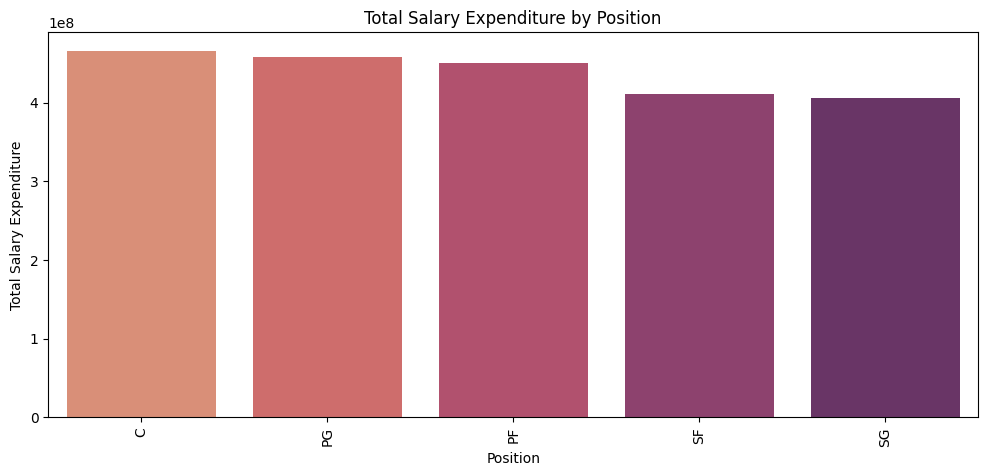

<ipython-input-24-3827453375>:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


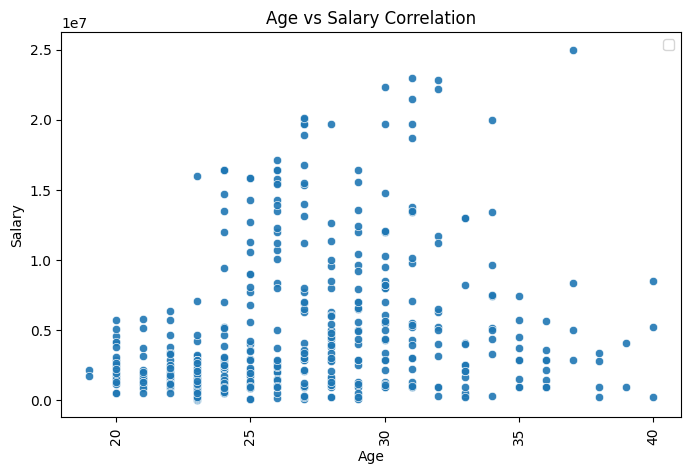

In [24]:
#Graphical Representation:
#For each of the five analysis tasks, create appropriate visualizations to present your findings effectively.


# Visualization 1:Distribution of Employees by Team
plt.figure(figsize=(12,5))
plt.title("Distribution of Employees by Team")
plt.xticks(rotation=90)
sns.barplot(x=distribution_of_emp.index, y=distribution_of_emp.values, palette="coolwarm")
plt.show()

# Visualization 2:Distribution of Employees by Position
plt.figure(figsize=(8, 5))
sns.barplot(x=position_distr.index, y=position_distr.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Employees by Position")
plt.show()

# Visualization 3:Predominant Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="Blues")
plt.title("Predominant Age Group")
plt.show()

# Visualization 4a:Total Salary Expenditure by Team
highest_salary_team = df.groupby('Team')['Salary'].sum().sort_values(ascending=False) #group by team
plt.figure(figsize=(12,5))
sns.barplot(x=highest_salary_team.index,y=highest_salary_team.values,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('team')
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Team")
plt.show()

# Visualization 4b:Total Salary Expenditure by Position
highest_salary_position = df.groupby('Position')['Salary'].sum().sort_values(ascending=False) #groupby by position
plt.figure(figsize=(12,5))
sns.barplot(x=highest_salary_position.index,y=highest_salary_position.values,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Position')
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Position")
plt.show()


# Visualization 5: Correlation between Age and Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], alpha=0.9)
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.legend()
plt.show()
